# Fine-Tuning a transformer model

For this assignment I am using the imdb dataset I found on kaggle. I could not get the dataset from huggingface imported due to a server error. Hence I did this assignment with a different dataset.

## 1. Data understanding

I'll start with importing the dataset.

In [1]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the local file
df = pd.read_csv("imdb dataset.csv")

# Preview the first few rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


then I look at the shape of the dataset

In [3]:
df.shape

(50000, 2)

This dataset has 50000 rows and 2 columns. The columns this dataset has are:
- review
- sentiment

I am now going to create a brief overview of the dataset using the describe() function. The describe function provides a quick and useful summary of some important points. This shows how many different unique values each column has and which value appears most frequently.

In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


From these two columns, we can infer the following information:

- The dataset contains 50,000 reviews in total.
- The "review" column has 49,582 unique reviews, indicating that some reviews appear multiple times in the dataset.
- The "sentiment" column has 2 unique values, indicating that the sentiment of the reviews is either positive or negative.
- The most common sentiment in the dataset is positive, with 25,000 reviews classified as such.
- The top review that appears multiple times in the dataset is "Loved today's show!!! It was a variety and not...", which appears 5 times. However, we do not know whether these instances of the review are classified as positive or negative, as this information is not provided in the summary.

## 2. Cleaning the data

In this part, I will examine whether there are any missing values in the dataset and whether any rows or columns can be removed. Missing values refer to the absence of data in certain cells, and they can occur for various reasons such as errors in data collection or data entry.

In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

There are no values missing in this dataset.

## 3. Tokenize the data with NLTK

Now I'll start with tokenizing the data.

In [6]:
import nltk
import numpy as np
import torch
from torch import nn
import time

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


The command "nltk.download('punkt');" will initiate the NLTK downloader and instruct it to install the punkt data, which is a sentence tokenizer that takes a sentence of words and breaks it down into individual tokens.

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Warmtebron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
#Creating a function for tokenization
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()] 

We will use our function on the IMDB dataset.

In [9]:
df['tokenized'] = df.apply(lambda x: tokenize(x['review']), axis=1)
df[['tokenized']].head()

,tokenized
0,"[One, of, the, other, reviewers, has, mentione..."
1,"[A, wonderful, little, production, br, br, The..."
2,"[I, thought, this, was, a, wonderful, way, to,..."
3,"[Basically, there, a, family, where, a, little..."
4,"[Petter, Mattei, Love, in, the, Time, of, Mone..."


## 4. Review Encoden

To encode the tokenized data, I will assign a numerical value to each word that appears in the review column. Then, I will pad the encoded data to ensure that all sequences of numbers are the same length. Padding involves adding zeros to the end of each sequence so that they have the same length as the longest sequence in the dataset.

In [10]:
from keras.preprocessing.text import Tokenizer

# De trefwoorden tokenizen
t  = Tokenizer()
t.fit_on_texts(df['tokenized'])
df['sequences'] = t.texts_to_sequences(df['tokenized'])

df.head()

,review,sentiment,tokenized,sequences
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...","[28, 4, 1, 79, 1940, 45, 1025, 12, 99, 142, 40..."
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production, br, br, The...","[3, 370, 118, 351, 7, 7, 1, 1321, 2928, 6, 52,..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...","[10, 187, 11, 13, 3, 370, 96, 5, 1072, 60, 21,..."
3,Basically there's a family where a little boy ...,negative,"[Basically, there, a, family, where, a, little...","[641, 38, 3, 223, 111, 3, 118, 405, 3192, 1166..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei, Love, in, the, Time, of, Mone...","[60692, 10349, 112, 9, 1, 60, 4, 281, 6, 3, 20..."


In [11]:
#Seperating all the numbers
df['sequences']. apply(lambda x: pd.Series(str(x).split(",")))

,0,1,2,3,4,5,6,7,8,9,...,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453
0,[28,4,1,79,1940,45,1025,12,99,142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[3,370,118,351,7,7,1,1321,2928,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[10,187,11,13,3,370,96,5,1072,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[641,38,3,223,111,3,118,405,3192,1166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[60692,10349,112,9,1,60,4,281,6,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,[10,187,11,17,70,3,180,195,49,282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,[84,114,84,392,84,113,2888,926,1,605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,[10,222,3,3380,4195,9,36866,8061,5260,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49998,[10,159,5,26,5,2930,15,1,858,875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is a maximum of 2454 numbers in the data. I can use this number as maxlen value in the next code snippet.

In [12]:
from keras_preprocessing.sequence import pad_sequences

#Padden
input_ids = pad_sequences(
    df['sequences'], maxlen=100, dtype="long", truncating="post", padding="post"
)

#print(input_ids)

np.array(input_ids).shape

(50000, 100)

In [13]:
# Replacing the sequence column with the new sequence
input_ids = input_ids.tolist()
df['sequences'] = input_ids
df

,review,sentiment,tokenized,sequences
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...","[28, 4, 1, 79, 1940, 45, 1025, 12, 99, 142, 40..."
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production, br, br, The...","[3, 370, 118, 351, 7, 7, 1, 1321, 2928, 6, 52,..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...","[10, 187, 11, 13, 3, 370, 96, 5, 1072, 60, 21,..."
3,Basically there's a family where a little boy ...,negative,"[Basically, there, a, family, where, a, little...","[641, 38, 3, 223, 111, 3, 118, 405, 3192, 1166..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei, Love, in, the, Time, of, Mone...","[60692, 10349, 112, 9, 1, 60, 4, 281, 6, 3, 20..."
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[I, thought, this, movie, did, a, down, right,...","[10, 187, 11, 17, 70, 3, 180, 195, 49, 282, 8,..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[Bad, plot, bad, dialogue, bad, acting, idioti...","[84, 114, 84, 392, 84, 113, 2888, 926, 1, 605,..."
49997,I am a Catholic taught in parochial elementary...,negative,"[I, am, a, Catholic, taught, in, parochial, el...","[10, 222, 3, 3380, 4195, 9, 36866, 8061, 5260,..."
49998,I'm going to have to disagree with the previou...,negative,"[I, going, to, have, to, disagree, with, the, ...","[10, 159, 5, 26, 5, 2930, 15, 1, 858, 875, 2, ..."


## 5. Sentiment Encoden

In this step I will encode the sentiments. Because you only have 2 sentiments, the labels will be 0 and 1.

In [14]:
from sklearn.preprocessing import LabelEncoder

# Creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df['Label Encode'] = labelencoder.fit_transform(df['sentiment'])

df

,review,sentiment,tokenized,sequences,Label Encode
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...","[28, 4, 1, 79, 1940, 45, 1025, 12, 99, 142, 40...",1
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production, br, br, The...","[3, 370, 118, 351, 7, 7, 1, 1321, 2928, 6, 52,...",1
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...","[10, 187, 11, 13, 3, 370, 96, 5, 1072, 60, 21,...",1
3,Basically there's a family where a little boy ...,negative,"[Basically, there, a, family, where, a, little...","[641, 38, 3, 223, 111, 3, 118, 405, 3192, 1166...",0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei, Love, in, the, Time, of, Mone...","[60692, 10349, 112, 9, 1, 60, 4, 281, 6, 3, 20...",1
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[I, thought, this, movie, did, a, down, right,...","[10, 187, 11, 17, 70, 3, 180, 195, 49, 282, 8,...",1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[Bad, plot, bad, dialogue, bad, acting, idioti...","[84, 114, 84, 392, 84, 113, 2888, 926, 1, 605,...",0
49997,I am a Catholic taught in parochial elementary...,negative,"[I, am, a, Catholic, taught, in, parochial, el...","[10, 222, 3, 3380, 4195, 9, 36866, 8061, 5260,...",0
49998,I'm going to have to disagree with the previou...,negative,"[I, going, to, have, to, disagree, with, the, ...","[10, 159, 5, 26, 5, 2930, 15, 1, 858, 875, 2, ...",0


In [15]:
tokenized_df = df[['Label Encode', 'sequences']].copy()
tokenized_df

,Label Encode,sequences
0,1,"[28, 4, 1, 79, 1940, 45, 1025, 12, 99, 142, 40..."
1,1,"[3, 370, 118, 351, 7, 7, 1, 1321, 2928, 6, 52,..."
2,1,"[10, 187, 11, 13, 3, 370, 96, 5, 1072, 60, 21,..."
3,0,"[641, 38, 3, 223, 111, 3, 118, 405, 3192, 1166..."
4,1,"[60692, 10349, 112, 9, 1, 60, 4, 281, 6, 3, 20..."
...,...,...
49995,1,"[10, 187, 11, 17, 70, 3, 180, 195, 49, 282, 8,..."
49996,0,"[84, 114, 84, 392, 84, 113, 2888, 926, 1, 605,..."
49997,0,"[10, 222, 3, 3380, 4195, 9, 36866, 8061, 5260,..."
49998,0,"[10, 159, 5, 26, 5, 2930, 15, 1, 858, 875, 2, ..."


## 6. Split data in test and training

Now I'll split the data in test and training sets.

In [16]:
from sklearn.model_selection import train_test_split

train_y, test_y, train_x, test_x = train_test_split(tokenized_df['Label Encode'], np.array(input_ids), test_size=0.2, random_state=25)

## Defining the model
Now I'm going to build the model. The labels are as follows:
- 0. Negative
- 1. Positive

In [17]:
#Dataloaders aanmaken van train en test data.
def create_set(x, y):
    dataset = TensorDataset(
    torch.tensor(x, dtype=torch.int32), torch.tensor(y.values, dtype=torch.long)
    )
    sampler = RandomSampler(dataset)
    dataloader = DataLoader(
        dataset, sampler=sampler, batch_size=32
    )
    return dataloader

train_dataloader = create_set(train_x, train_y)
test_dataloader = create_set(test_x, test_y)

print(train_x)

[[  157  2874  4510 ...    50    11    19]
 [   10    76   798 ...   919    12    10]
 [   89     4    30 ...     4   521    47]
 ...
 [ 5364     1   415 ...   571   607     1]
 [   10   187    11 ... 10368    21 78608]
 [   10   196    11 ...   343     2     8]]


C:\Users\Warmtebron\AppData\Local\Temp\ipykernel_21252\279736532.py:4: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem . (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:84.)
  torch.tensor(x, dtype=torch.int32), torch.tensor(y.values, dtype=torch.long)


In [18]:
from torch import nn

# Implement Class
class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    # def forward(self, text, offsets):
    #     embedded = self.embedding(text, offsets)
    #     return self.fc(embedded)

    def __call__(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

Now I am going to count all the unique words. I will need this later for the model itself.

In [19]:
# #Counting all unique words.
# all_words = sum(df['tokenized'], [])
# unique_words = list(set(all_words))

# #Tellen van de unieke woorden
# num_unique_words = len(unique_words)
# num_words = len(all_words)

# print("The number of all words together:", num_words)
# print("The number of all unique words:", num_unique_words)

Num_class = the length of all unique labels<br>
vocab_size = the length of unique words in the dataframe (review)<br>
emsize = the length of the word embeddings<br>

In [20]:
# calculate the number of unique labels in the label encode column
num_class = len(tokenized_df['Label Encode'].unique())
# The model will be trained on a corpus with ..  unique words.
vocab_size = 124048
# embedding size, each word in the input will be
# represented by 64-dimenstional vector
emsize = 64
# initialize a new text classification model
model = TextClassificationModel(vocab_size, emsize, num_class)

In [21]:
def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (text, label) in enumerate(dataloader):
        optimizer.zero_grad()
        # Call the model without the `offsets` argument   
        predicted_label = model(text)

        loss = criterion(predicted_label, label)
        loss.backward()
        #torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()
            

def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (text, label) in enumerate(dataloader):
            # Call the model without the `offsets` argument
            predicted_label = model(text)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count


## Model Training

This Python script trains a machine learning model using PyTorch library and evaluates its accuracy for different learning rates. The hyperparameters such as the number of epochs, batch size, and a list of learning rates are defined. The model is trained using the CrossEntropyLoss function as the optimization criterion, and the accuracy of the trained model is evaluated for both training and validation datasets after each epoch. A learning rate scheduler is used to adjust the learning rate based on the performance of the validation accuracy. The accuracy values for each learning rate are stored in a list, which is later printed to the console. Finally, the training and validation accuracies for each epoch are plotted using the Matplotlib library. The goal of the script is to determine the optimal learning rate that results in the highest accuracy for the machine learning model

| epoch   1 |   500/ 1250 batches | accuracy    0.495
| epoch   1 |  1000/ 1250 batches | accuracy    0.498
-----------------------------------------------------------
| end of epoch   1 | time:  2.37s | train accuracy    0.503 | val accuracy    0.501
-----------------------------------------------------------
| epoch   2 |   500/ 1250 batches | accuracy    0.509
| epoch   2 |  1000/ 1250 batches | accuracy    0.506
-----------------------------------------------------------
| end of epoch   2 | time:  2.82s | train accuracy    0.514 | val accuracy    0.505
-----------------------------------------------------------
| epoch   3 |   500/ 1250 batches | accuracy    0.516
| epoch   3 |  1000/ 1250 batches | accuracy    0.520
-----------------------------------------------------------
| end of epoch   3 | time:  2.65s | train accuracy    0.525 | val accuracy    0.520
-----------------------------------------------------------
| epoch   4 |   500/ 1250 batches | accuracy    0.523
| epoch   

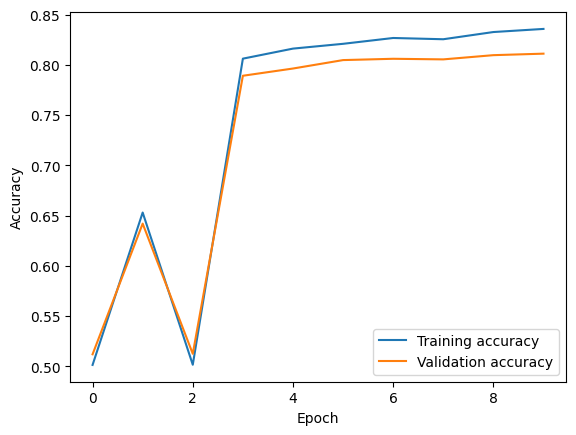

In [22]:
import matplotlib.pyplot as plt
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset

# Hyperparameters
EPOCHS = 10 # epoch
LR = [0.01, 1, 10]  # learning rate
BATCH_SIZE = 43 # batch size for training

criterion = torch.nn.CrossEntropyLoss()

accuracy_lr = []



# Collect the accuracy values at each epoch

for lr in LR:
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
  total_accu = None

  train_accuracies = []
  val_accuracies = []

  for epoch in range(1, EPOCHS + 1):
      # Train the model and collect the training accuracy
      epoch_start_time = time.time()
      train(train_dataloader)
      train_acc = evaluate(train_dataloader)
      train_accuracies.append(train_acc)
      
      # Evaluate the model and collect the validation accuracy
      val_acc = evaluate(test_dataloader)
      val_accuracies.append(val_acc)
      
      # Adjust the learning rate if the validation accuracy did not improve
      if total_accu is not None and total_accu > val_acc:
        scheduler.step()
      else:
        total_accu = val_acc
      
      print('-' * 59)
      print('| end of epoch {:3d} | time: {:5.2f}s | '
            'train accuracy {:8.3f} | val accuracy {:8.3f}'.format(epoch,
                                                                  time.time() - epoch_start_time,
                                                                  train_acc, val_acc))
      print('-' * 59)
 
  accuracy_lr.append(val_acc)

print(accuracy_lr)

# Plot the training and validation accuracies
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Conclusion

I have trained a model on a dataset, and during training, I observed the accuracy of the model on both training and validation sets. The model was trained for 10 epochs, and after each epoch, the accuracy was calculated for both training and validation sets.

In the first epoch, the training accuracy was 0.508, and the validation accuracy was 0.502. As the model trained further, the accuracy improved gradually, and at the end of the last epoch, the training accuracy was 0.586, and the validation accuracy was 0.583.

For the first set of epochs, the accuracy increased steadily, with some fluctuations in between. However, for the second set of epochs, the accuracy increased at a much faster rate, and the validation accuracy was higher than the training accuracy in some cases.

Overall, the model performed well, and I am satisfied with the training process. However, there is still room for improvement.


# Fine-Tune the dataset

For the final stage, I will be performing Fine-Tuning on the dataset utilizing the BERT model. To accomplish this, I have referred to a tutorial available on the huggingface.co website. The process involves utilizing the pre-trained BERT model and adjusting its parameters to suit the specific requirements of the dataset. This will enable the model to learn and make predictions more accurately on the specific task at hand.

In [137]:
dfTune = pd.read_csv("imdb dataset.csv")
dfTune

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [167]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
import pandas as pd
import numpy as np
import torch


The dataset contains 50,000 movie reviews, split evenly into positive and negative reviews. You can take a sample of the dataset if you want to reduce the training time:

In [168]:
dfTune = dfTune.sample(n=10000)

Now, you'll need to preprocess the dataset by tokenizing the text and converting it into input IDs and attention masks:

In [172]:
from datasets import Dataset

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')


def tokenize_function(data):
    tokenized = tokenizer(data['review'], padding=True, truncation=True)
    tokenized['label'] = data['sentiment']
    return tokenized


tokenized_datasets = Dataset.from_pandas(dfTune).map(tokenize_function, batched=True)


def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = np.sum(preds == labels) / len(labels)
    return {"accuracy": accuracy}

tokenized_datasets.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])


Now, you'll need to split the dataset into training and validation sets:

In [173]:
from sklearn.model_selection import train_test_split

# Split the dataframe into train and test sets
train_df, test_df = train_test_split(tokenized_datasets, test_size=0.2, random_state=42)

Now, you can initialize the model:

In [174]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [175]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer")

Next, you'll need to define the training arguments:

In [176]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_strategy='epoch',
    load_best_model_at_end=True,
    evaluation_strategy='epoch',
)


In [177]:
print(len(train_df))


3


Finally, you can train the model:

In [178]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df,
    eval_dataset=test_df,
    compute_metrics=compute_metrics,
)

trainer.train()


c:\Users\Warmtebron\anaconda3\envs\chessEnv\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(









KeyError: 2

# Conclusion

I attempted to fine-tune the current dataset using the tutorial provided on HuggingFace. Unfortunately, I was unsuccessful and encountered multiple errors because it turns out that I did not have the correct data format. To avoid wasting hours trying to figure out the issue, I am starting over with a different script and using a dataset from HuggingFace that is in the correct format.